# Esperienza n. 1

In [4]:
%run 'Base_Load.ipynb'

In [5]:
def multimetro_sd(x):
    if(isinstance(x, int)): 
        s = str(x)
        ret = 1
    else:
        s = str(x)
        for k in range(len(s)):
            if (s[k] == '.'):
                a = k
        ret = 2*10**(-len(s[a+1:]))
    sd= 0.5/100*x + ret
    return (sd)


def multimeasure_multimetro_sd(x): # BISOGNA DARE UNA LISTA, NON UN ARRAY
    sd = []
    for i in range(len(x)):
        ret = multimetro_sd(x[i])
        sd.append(ret)
    sd = array(sd)
    return (sd)

In [ ]:
#Multimetro METEX M-4650

## Legge di Malus

### Parte 1 - due polaroid

In [108]:
b = 7.6e-3#Segnale di buio/fondo
sdb = multimetro_sd(b)
thetha_est = 49 #Angolo di riferimento - Estinzione
theta0 = thetha_est-90 #Angolo di riferimento - 0
sdtheta0 = 1

I = [0.62, 0.120, 0.022, 0.25, 0.86, 1.63, 2.54, 3.66, 4.82, 5.66, 5.87, 6.04, 6.18, 6.32, 6.36, 6.27, 6.16, 5.95, 5.54, 5.02, 4.53, 4.13, 3.03, 2.04, 1.13, 0.51, 0.11, 0.011, 0.19, 0.60,  ] #Segnale letto dal rivelatore (multimetro) [V]
theta = array([30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 124, 128 ,132, 136, 140, 144, 148, 152, 156, 160, 166, 170, 180, 190, 200, 210, 220, 230, 240, 250,  ]) - theta0 #Angolo del Polaroid

sdI = multimeasure_multimetro_sd(I)
I = asarray(I)
I -= b #Sottraggo il segnale di buio

sdtheta = 1
sdtheta = sqrt(sdtheta**2 + sdtheta0**2)


<Container object of 3 artists>

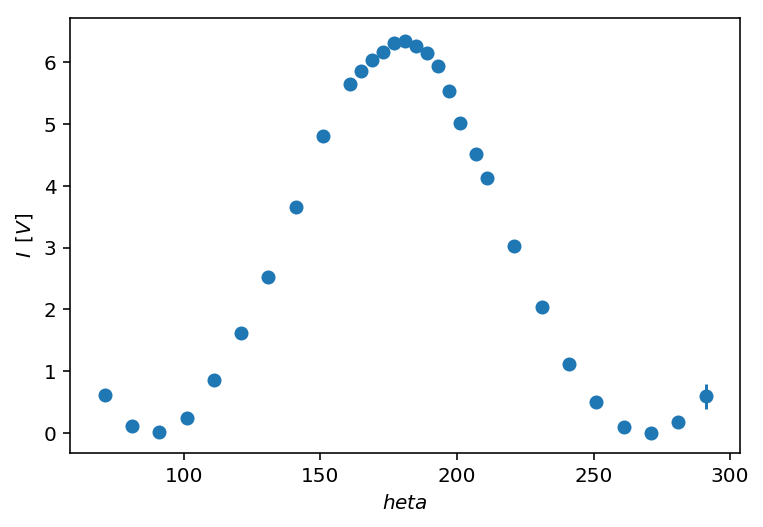

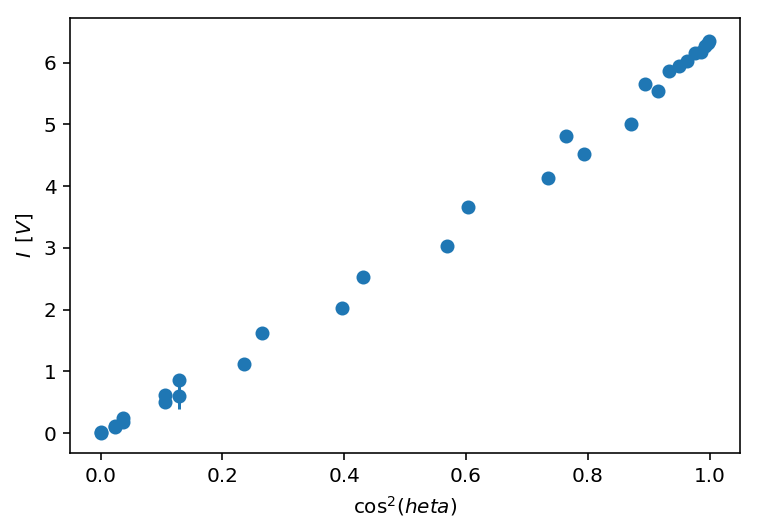

In [109]:
figure(1)
xlabel("$\theta$")
ylabel("$I\,\,\,[V]$") 
errorbar(theta, I, yerr = sdI, xerr=sdtheta, fmt='o')

figure(2)
xlabel("$\cos^2(\theta)$")
ylabel("$I\,\,\,[V]$") 
errorbar((cos(theta*pi/180))**2, I, yerr = sdI, fmt='o')

#### Singolo Polaroid

In [110]:
I = [6.02, 6.64, 7.92, 8.82, 9.13, 8.95, 7.90, 7.45, 7.88, 7.96, 8.32, 9.12, 9.40, 8.90, 7.80, 7.00, 6.40 ] #Segnale letto dal rivelatore (multimetro) [V]
theta = array([250, 270, 290, 310, 330, 350, 360+10, 360+30, 360+60, 360+80, 360+100, 360+120, 360+140, 360+170, 360+190, 360+210, 360+230   ]) - theta0 #Angolo del Polaroid

sdI = multimeasure_multimetro_sd(I)
I = asarray(I)
I -= b #Sottraggo il segnale di buio

<Container object of 3 artists>

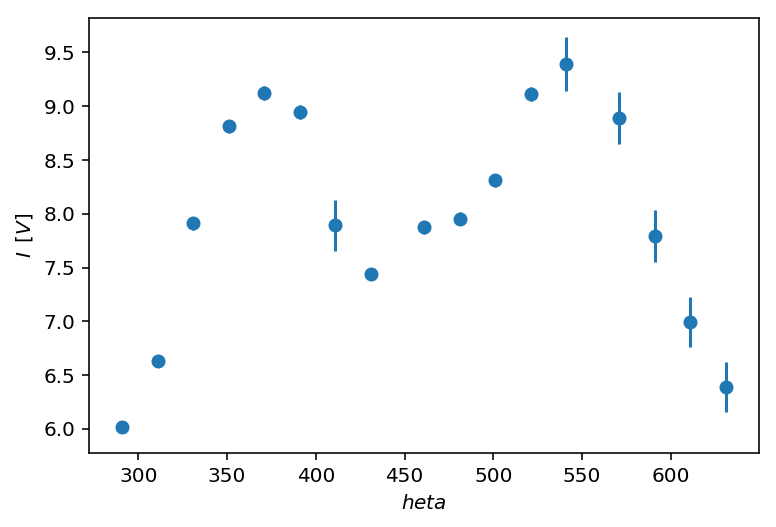

In [111]:
figure(1)
xlabel("$\theta$")
ylabel("$I\,\,\,[V]$") 
errorbar(theta, I, yerr = sdI, xerr=sdtheta, fmt='o')

#figure(2)
#xlabel("$\cos^2(\theta)$")
#ylabel("$I\,\,\,[V]$") 
#errorbar((cos(theta*pi/180))**2, I, yerr = sdI, fmt='o')

In [10]:
x = (cos(theta))**2
p,V= polyfit(x, I, 1, cov=True)

res = (I-(p[0]*x+p[1]))**2/sdy**2
chi2 = sum(res)
chi2

ValueError: the number of data points must exceed order + 2 for Bayesian estimate the covariance matrix

### Parte 2 - tre polaroid

In [112]:
thetha_est = 140 #Angolo di riferimento - Estinzione
theta0 = thetha_est #Angolo di riferimento - 0
sdtheta0 = 1

#0.010, 0.124, 0.41, 0.73, 0.89, 0.86, 0.65, 0.35, 0.104, 0.022, 0.146, 0.439, 0.75, 0.96, 0.70, 0.36, 0.075, 0.025, 0.18, 0.54, 0.96, 1.25, 1.24, 0.95, Tensione polaroid diseallineato 
#228, 238, 248, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, angolo polaroid diseallineato
I = [1.98, 0.70, 0.058, 0.50, 2.07, 3.19, 4.2, 4.2, 3.28, 2.62, 0.39, 0.031, 0.84, 2.46, 4.06, 5.0, 4.7, 3.4, 1.89, 0.59, 0.051, 0.35, 1.28, 2.46, 3.15, 3.22, 2.51, 1.32, 0.23, 0.019, 0.65, 1.82, 3.24, 4.2, 4.18, 3.27, 1.90, 0.60, 0.058, 0.53, 1.76, 3.30] #Segnale letto dal rivelatore (multimetro)
theta = array([120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530,]) - theta0 #Angolo del Polaroid

sdI = multimeasure_multimetro_sd(I)
I = asarray(I)
I -= b #Sottraggo il segnale di buio

sdtheta = 1
sdtheta = sqrt(sdtheta**2 + sdtheta0**2)

<Container object of 3 artists>

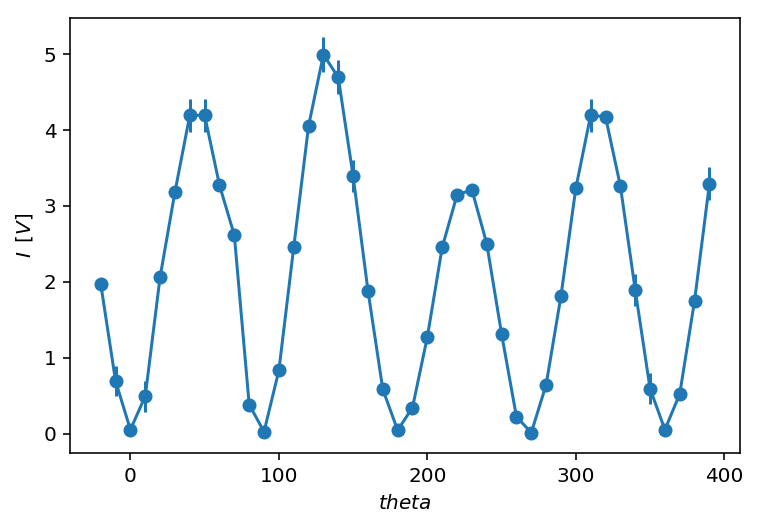

In [113]:
figure(1)
xlabel("$theta$")
ylabel("$I\,\,\,[V]$") 
errorbar(theta, I, yerr = sdI, fmt='o-')

## Angolo di Brewster

In [145]:
theta_p0 = 52 #Annullameto TM 
theta_s0 = 322 #Annullameto TE

theta0 = 80 #Riferimento angolo del Plexiglass
sdtheta0 = 1

Is0 = 9.23-b #Intensità TM senza Plexiglass OLD: 8.27
Ip0 = 8.87-b #Intensità TE senza Plexiglass OLD: 5.23
sdIp0 = multimetro_sd(Ip0)
sdIs0 = multimetro_sd(Is0)

<Container object of 3 artists>

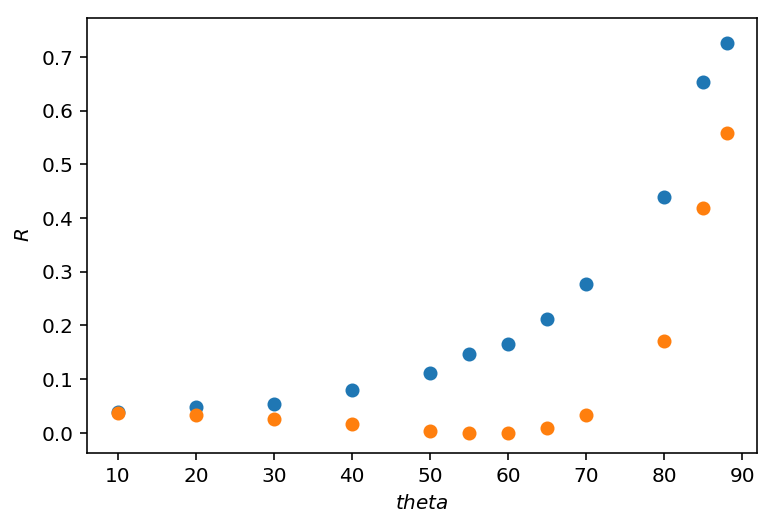

In [146]:
Is = [0.358, 0.456, 0.502, 0.748, 1.028, 1.36, 1.53, 1.96, 2.56, 4.05, 6.03, 6.71] #TE
Ip = [0.328, 0.297, 0.242, 0.153, 0.043, 7.7e-3, 9.6e-3, 93e-3, 0.302, 1.52, 3.71, 4.95] #TM
theta = -array([70, 60, 50, 40, 30, 25, 20, 15, 10, 0, -5, -8 ]) + theta0 #Angolo del Polaroid

sdtheta = 1
sdtheta = sqrt(sdtheta**2 + sdtheta0**2)

sdIp = multimeasure_multimetro_sd(Ip)
Ip = asarray(Ip)
Ip -= b #Sottraggo il segnale di buio

Rp = Ip/Ip0
sdRp = Rp*(sdIp/Ip + sdIp0/Ip0) 

sdIs = multimeasure_multimetro_sd(Is)
Is = asarray(Is)
Is -= b #Sottraggo il segnale di buio

Rs = Is/Is0
sdRs = Rs*(sdIs/Is + sdIs0/Is0)

figure(1)
xlabel("$theta$")
ylabel("$R$") 
errorbar(theta, Rs, yerr = sdRs, fmt='o')
errorbar(theta, Rp, yerr = sdRp, fmt='o')